## Python Data Scripting Assignment

In this notebook, I will try to answer to the questions below: 
1. Find the five athletes who won the most gold medals in Athletics
2. Find the five athletes who won gold medals in the largest number of different athletic events
3. If the olympics committee found guilty of doping the first and the third of the five athletes from question2, create a new medals.csv dataset with redistributed medals after the gold medals of those two athletes are removed. Who then are the top five that won gold medals in the largest number of different athletic events?

#### Collect the database and clean the data

Doing the following steps: 
- Import packages and dataset
- Exclude unknown and rename in order to be consistent in spelling, exct
- Filter only for discipline Athletics (as the exercise focus on it)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

medals = pd.read_csv('medals.csv')  

medals.head(5)

,Games,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
0,Athens (1896),1896,Aquatics,Swimming,alfred hajos,HUN,Men,100m freestyle men,Gold,1,0,0
1,Athens (1896),1896,Aquatics,Swimming,Otto Herschmann,AUT,Men,100m freestyle men,Silver,0,1,0
2,Athens (1896),1896,Aquatics,Swimming,dimitrios drivas,GRE,Men,100m freestyle for sailors men,Bronze,0,0,1
3,Athens (1896),1896,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100m freestyle for sailors men,Gold,1,0,0
4,Athens (1896),1896,Aquatics,Swimming,spiridon chasapis,GRE,Men,100m freestyle for sailors men,Silver,0,1,0


In [2]:
#Exclude the unknown Athlete

medals = medals[medals['Athlete'] != '#NAME?']


#All lower cases with capital letter for the athelete's names to avoid difference in spelling 

medals['Athlete'] = medals['Athlete'].str.title()

In [3]:
#Some of the athletes are spelled differently over time, here I remap them using a unique spelling

medals = medals.replace({'Athlete': {'Bo Bae Ki': 'Bobae Ki',
                                     'Cha Youn Kim': 'Chayoun Kim',
                                     'Hyunhee Nam': 'Hyun Hee Nam',
                                     'Im Jeong Choi': 'Imjeong Choi',
                                     'Jinhee Yoon': 'Jin Hee Yoon',
                                     'Jung Joo Kim': 'Jungjoo Kim',
                                     'Min Ho Choi': 'Minho Choi',
                                     'Mi Ran Jang': 'Miran Jang',
                                     'Pil Hee Moon': 'Pilhee Moon',
                                     'Yongdae Lee': 'Yong Dae Lee',
                                     'Yue Gu Wang': 'Yuegu Wang'
                                    }})

In [4]:
#Some of the Teams changed name over time. I will map here the one I can map easily (for example DDR-> GER). 
#Some I cannot change (for example the mixed team)

medals = medals.replace({'Team': {'BOH': 'AUT',
                                     'ANZ': 'AUS',
                                     'EUA': 'GER',
                                     'FRG': 'GER',
                                     'RU1': 'RUS',
                                     'GDR': 'GER'
                                    }})

In [5]:
#Soviet union collapsed in 1991, therefore all athletes changed country in 1991. Same for Yugoslavia from 1995 
#For this exercise I will map them all with the post soviet country.

medals['post_soviet_country'] = medals.groupby(['Athlete'])['Team'].shift(-1)

medals['Team']= np.where(medals['post_soviet_country'].isna(), medals['Team'], medals['post_soviet_country'])

medals = medals.drop(columns='post_soviet_country')

In [6]:
# Add the country to the athlete name

medals['Athlete_Team'] = medals.Athlete.map(str) + " (" + medals.Team + ")"

In [7]:
#Filter to include only Athletics 

athletics_medal = medals[medals['Discipline'] == 'Athletics']

athletics_medal.head(5)

,Games,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze,Athlete_Team
11,Athens (1896),1896,Athletics,Athletics,Francis Lane,USA,Men,100m men,Bronze,0,0,1,Francis Lane (USA)
12,Athens (1896),1896,Athletics,Athletics,Alajos Szokolyi,HUN,Men,100m men,Bronze,0,0,1,Alajos Szokolyi (HUN)
13,Athens (1896),1896,Athletics,Athletics,Thomas Burke,USA,Men,100m men,Gold,1,0,0,Thomas Burke (USA)
14,Athens (1896),1896,Athletics,Athletics,Fritz Hofmann,GER,Men,100m men,Silver,0,1,0,Fritz Hofmann (GER)
15,Athens (1896),1896,Athletics,Athletics,Thomas Curtis,USA,Men,110m hurdles men,Gold,1,0,0,Thomas Curtis (USA)


#### 1. Find the five athletes who won the most gold medals in Athletics

In [8]:
#Collect the top 5 athletes

top_athletics_gold = athletics_medal.groupby(by = 'Athlete_Team', as_index=False).agg({'Gold':sum})

top_5_athletics_gold= top_athletics_gold.sort_values("Gold", ascending=False).head(5)

top_5_athletics_gold

,Athlete_Team,Gold
318,Carl Lewis (USA),29
2080,Paavo Nurmi (FIN),9
2570,Usain Bolt (JAM),9
2175,Ray Ewry (USA),8
79,Allyson Felix (USA),6


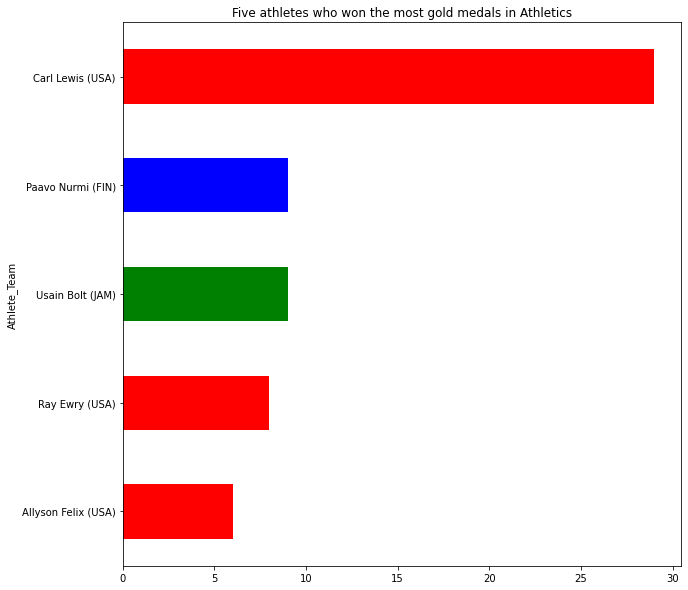

In [9]:
#Visualise the results 

(top_5_athletics_gold
 .plot.barh(x='Athlete_Team', 
           y='Gold', 
           figsize = (10,10),
           color=['red', 'blue', 'green', 'red', 'red'],
           legend = False, 
           title = 'Five athletes who won the most gold medals in Athletics')
).invert_yaxis()

In [10]:
list_of_single_athletes_most_gold_medals = top_5_athletics_gold['Athlete_Team'].tolist()

print("The 5 athletes who won most gold medals are ",list_of_single_athletes_most_gold_medals)

The 5 athletes who won most gold medals are  ['Carl Lewis (USA)', 'Paavo Nurmi (FIN)', 'Usain Bolt (JAM)', 'Ray Ewry (USA)', 'Allyson Felix (USA)']


#### 2. Find the five athletes who won gold medals in the largest number of different athletic events

In [11]:
#Collect the top 5 athletes per unique number of events where they won gold

athletics_medal_only_gold = athletics_medal[athletics_medal['Gold'] > 0]

top_athletics_event = athletics_medal_only_gold.groupby(by = 'Athlete_Team', as_index=False).agg({ "Event": lambda x: x.nunique()})

top_5_athletics_event= top_athletics_event.sort_values("Event", ascending=False).head(5)

top_5_athletics_event

,Athlete_Team,Event
902,Usain Bolt (JAM),6
715,Paavo Nurmi (FIN),6
923,Ville Ritola (FIN),5
28,Allyson Felix (USA),5
94,Betty Cuthbert (AUS),4


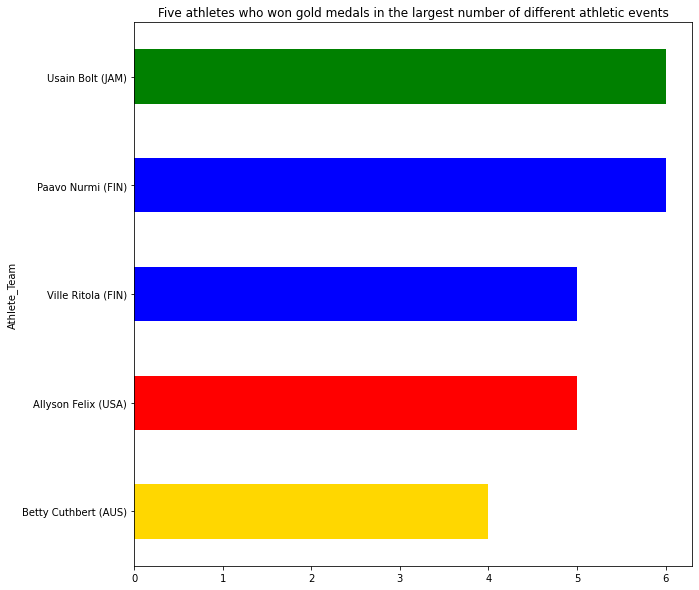

In [12]:
#Visualise the results 

(top_5_athletics_event
 .plot.barh(x='Athlete_Team', 
           y='Event', 
           figsize = (10,10),
           color=['green', 'blue', 'blue', 'red', 'gold'],
           legend = False, 
           title = 'Five athletes who won gold medals in the largest number of different athletic events')
).invert_yaxis()

In [13]:
list_of_single_athletes_most_events = top_5_athletics_event['Athlete_Team'].tolist()

print("The 5 athletes who won gold medals in the largest number of different athletic events are ",list_of_single_athletes_most_events)

The 5 athletes who won gold medals in the largest number of different athletic events are  ['Usain Bolt (JAM)', 'Paavo Nurmi (FIN)', 'Ville Ritola (FIN)', 'Allyson Felix (USA)', 'Betty Cuthbert (AUS)']


#### 3. If the olympics committee found guilty of doping the first and the third of the five athletes from question2, create a new medals.csv dataset with redistributed medals after the gold medals of those two athletes are removed. Who then are the top five that won gold medals in the largest number of different athletic events?

In [14]:
#Create a dataframe with the gold medal winner per year, event and gender

athletics_medal_gold_winners = athletics_medal[athletics_medal['Medal'] == 'Gold']

athletics_medal_gold_winners = athletics_medal_gold_winners[['Year', 'Event', 'Gender', 'Athlete_Team']]

athletics_medal_gold_winners = athletics_medal_gold_winners.rename(columns={"Athlete_Team": "Original_gold_winner"})

athletics_medal_gold_winners.head(5)


,Year,Event,Gender,Original_gold_winner
13,1896,100m men,Men,Thomas Burke (USA)
15,1896,110m hurdles men,Men,Thomas Curtis (USA)
18,1896,1500m men,Men,Edwin Flack (AUS)
21,1896,400m men,Men,Thomas Burke (USA)
24,1896,800m men,Men,Edwin Flack (ZZX)


In [15]:
#Add the column with the original gold winner to the athletics medal dataframe

athletics_medal_new = pd.merge(athletics_medal, 
                           athletics_medal_gold_winners,  
                           how='left', 
                           left_on= ['Year','Event', 'Gender'], 
                           right_on = ['Year','Event', 'Gender'])

athletics_medal_new.head(5)

,Games,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze,Athlete_Team,Original_gold_winner
0,Athens (1896),1896,Athletics,Athletics,Francis Lane,USA,Men,100m men,Bronze,0,0,1,Francis Lane (USA),Thomas Burke (USA)
1,Athens (1896),1896,Athletics,Athletics,Alajos Szokolyi,HUN,Men,100m men,Bronze,0,0,1,Alajos Szokolyi (HUN),Thomas Burke (USA)
2,Athens (1896),1896,Athletics,Athletics,Thomas Burke,USA,Men,100m men,Gold,1,0,0,Thomas Burke (USA),Thomas Burke (USA)
3,Athens (1896),1896,Athletics,Athletics,Fritz Hofmann,GER,Men,100m men,Silver,0,1,0,Fritz Hofmann (GER),Thomas Burke (USA)
4,Athens (1896),1896,Athletics,Athletics,Thomas Curtis,USA,Men,110m hurdles men,Gold,1,0,0,Thomas Curtis (USA),Thomas Curtis (USA)


In [16]:
#Rename the medal and add a column with the new medal, then select only the new Gold medals and print to CSV

athletics_medal_new = athletics_medal_new.rename(columns={"Medal": "Original_medal"})

athletes_catched_for_doping = ['Usain Bolt (JAM)', 'Ville Ritola (FIN)']

athletics_medal_new['New_medal']= np.where((athletics_medal_new['Original_medal'] == 'Silver') &
                                           (athletics_medal_new['Original_gold_winner'].isin(athletes_catched_for_doping)) 
                                           , 'Gold'
                                           , athletics_medal_new['Original_medal'])

athletics_medal_new['New_medal']= np.where((athletics_medal_new['Original_medal'] == 'Gold') &
                                           (athletics_medal_new['Athlete_Team'].isin(athletes_catched_for_doping)) 
                                           , 'Excluded for doping'
                                           , athletics_medal_new['New_medal'])


athletics_medal_new.head(5)

,Games,Year,Sport,Discipline,Athlete,Team,Gender,Event,Original_medal,Gold,Silver,Bronze,Athlete_Team,Original_gold_winner,New_medal
0,Athens (1896),1896,Athletics,Athletics,Francis Lane,USA,Men,100m men,Bronze,0,0,1,Francis Lane (USA),Thomas Burke (USA),Bronze
1,Athens (1896),1896,Athletics,Athletics,Alajos Szokolyi,HUN,Men,100m men,Bronze,0,0,1,Alajos Szokolyi (HUN),Thomas Burke (USA),Bronze
2,Athens (1896),1896,Athletics,Athletics,Thomas Burke,USA,Men,100m men,Gold,1,0,0,Thomas Burke (USA),Thomas Burke (USA),Gold
3,Athens (1896),1896,Athletics,Athletics,Fritz Hofmann,GER,Men,100m men,Silver,0,1,0,Fritz Hofmann (GER),Thomas Burke (USA),Silver
4,Athens (1896),1896,Athletics,Athletics,Thomas Curtis,USA,Men,110m hurdles men,Gold,1,0,0,Thomas Curtis (USA),Thomas Curtis (USA),Gold


In [17]:
#Create a new csv file with the list of the new gold medal winners

athletics_medal_new = athletics_medal_new[athletics_medal_new['New_medal'] == 'Gold']

athletics_medal_new.to_csv('new_medals.csv')

In [18]:
#Repeat the same exercise as done in question 2 to calculate and visualise the plot

top_athletics_event_new_medal = athletics_medal_new.groupby(by = 'Athlete_Team', as_index=False).agg({ "Event": lambda x: x.nunique()})

top_5_athletics_event_new_medal = top_athletics_event_new_medal.sort_values("Event", ascending=False).head(5)

top_5_athletics_event_new_medal

,Athlete_Team,Event
734,Paavo Nurmi (FIN),6
28,Allyson Felix (USA),5
365,Hannes Kolehmainen (FIN),4
99,Betty Cuthbert (AUS),4
472,Jesse Owens (USA),4


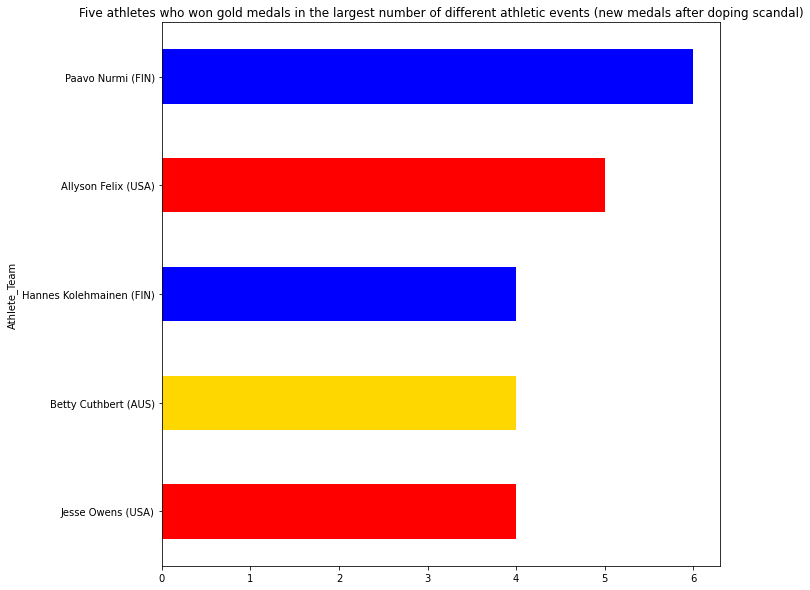

In [19]:
#Visualise the results 

(top_5_athletics_event_new_medal
 .plot.barh(x='Athlete_Team', 
           y='Event', 
           figsize = (10,10),
           color=['blue', 'red', 'blue', 'gold', 'red'],
           legend = False, 
           title = 'Five athletes who won gold medals in the largest number of different athletic events (new medals after doping scandal)')
).invert_yaxis()

In [20]:
list_of_single_athletes_most_events_new_medals = top_5_athletics_event_new_medal['Athlete_Team'].tolist()

print("The 5 athletes who won gold medals in the largest number of different athletic events (after doping scandal) are ",list_of_single_athletes_most_events_new_medals)

The 5 athletes who won gold medals in the largest number of different athletic events (after doping scandal) are  ['Paavo Nurmi (FIN)', 'Allyson Felix (USA)', 'Hannes Kolehmainen (FIN)', 'Betty Cuthbert (AUS)', 'Jesse Owens (USA)']
